In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.optimizers import rmsprop, adam
from keras.callbacks import TensorBoard, ModelCheckpoint

Using TensorFlow backend.


In [2]:
from pathlib import Path
dataset_dir = Path(r"C:/Users/user/OneDrive/Jupyter/Github/Image/Whole_rotateflip")

Read image data and convert file size to 6x6.

Read data-labels and data-names.

In [3]:

(width, height)=(6,6)

def load_dataset(dataset_dir):
    data = []
    labels = []
    names=[]

    for sub_dir in dataset_dir.iterdir():
        for img_path in sub_dir.iterdir():
            img = (Image.open(img_path))
            img = img.resize((width, height)) # File resize to 6×6

            img = np.array(img) # Exchange the image data into np.array type
            label = sub_dir.name # Make the label in directory name

            file_names = os.path.basename(img_path)
            
            data.append(img)
            labels.append(label)
            names.append(file_names)

    return np.array(data), np.array(labels), np.array(names) # Make the data and labels as np.array type


In [4]:
X,y,n = load_dataset(dataset_dir)

In [6]:
X.shape

(1434, 6, 6, 4)

In [7]:
y.shape

(1434,)

In [8]:
y[1:1000]

array(['0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero',
       '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Zero', '0_Ze

In [9]:
n[1:1000]

array(['0_matrix_Zero_1.png', '0_matrix_Zero_10.png',
       '0_matrix_Zero_100.png', '0_matrix_Zero_101.png',
       '0_matrix_Zero_102.png', '0_matrix_Zero_103.png',
       '0_matrix_Zero_104.png', '0_matrix_Zero_105.png',
       '0_matrix_Zero_106.png', '0_matrix_Zero_107.png',
       '0_matrix_Zero_108.png', '0_matrix_Zero_109.png',
       '0_matrix_Zero_11.png', '0_matrix_Zero_110.png',
       '0_matrix_Zero_111.png', '0_matrix_Zero_112.png',
       '0_matrix_Zero_113.png', '0_matrix_Zero_114.png',
       '0_matrix_Zero_115.png', '0_matrix_Zero_116.png',
       '0_matrix_Zero_117.png', '0_matrix_Zero_118.png',
       '0_matrix_Zero_119.png', '0_matrix_Zero_12.png',
       '0_matrix_Zero_120.png', '0_matrix_Zero_121.png',
       '0_matrix_Zero_122.png', '0_matrix_Zero_123.png',
       '0_matrix_Zero_124.png', '0_matrix_Zero_125.png',
       '0_matrix_Zero_126.png', '0_matrix_Zero_127.png',
       '0_matrix_Zero_128.png', '0_matrix_Zero_129.png',
       '0_matrix_Zero_13.png', '0_ma

ラベル： 0_matrix_Zero_0.png
ラベル： 0_matrix_Zero_1.png
ラベル： 0_matrix_Zero_10.png
ラベル： 0_matrix_Zero_100.png
ラベル： 0_matrix_Zero_101.png
ラベル： 0_matrix_Zero_102.png
ラベル： 0_matrix_Zero_103.png
ラベル： 0_matrix_Zero_104.png
ラベル： 0_matrix_Zero_105.png
ラベル： 0_matrix_Zero_106.png


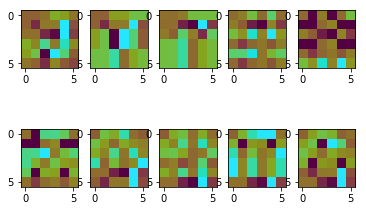

In [10]:
import cv2
for i in range(0, 10):
    print("ラベル：", n[i])
    plt.subplot(2, 5, i+1)
    plt.axis('on')
    #plt.title(label = 'Zero' if y[i] == 0 else 'One')
    img_array = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
plt.show()

Show the data as array. 

Data has the 4 dimensions and makes the data for 3 dimensions. 

Data value has the range of 0 to 255, the data shaped the range of 0 to 1.

In [12]:
X[0:1]

array([[[[ 51,  97, 141, 255],
         [ 51,  97, 141, 255],
         [ 44, 112, 142, 255],
         [ 38, 172, 129, 255],
         [ 30, 158, 136, 255],
         [ 43, 115, 142, 255]],

        [[ 51,  97, 141, 255],
         [ 71,  42, 121, 255],
         [ 41, 120, 142, 255],
         [ 40, 122, 142, 255],
         [253, 231,  36, 255],
         [ 60,  78, 138, 255]],

        [[ 44, 112, 142, 255],
         [ 44, 112, 142, 255],
         [ 71,  39, 119, 255],
         [ 69,   8,  91, 255],
         [253, 231,  36, 255],
         [ 66,  61, 132, 255]],

        [[ 38, 172, 129, 255],
         [ 36, 134, 141, 255],
         [141, 214,  68, 255],
         [ 41, 120, 142, 255],
         [189, 222,  38, 255],
         [ 35, 137, 141, 255]],

        [[ 30, 158, 136, 255],
         [ 71, 192, 110, 255],
         [ 68,   1,  84, 255],
         [253, 231,  36, 255],
         [116, 208,  84, 255],
         [ 53,  92, 140, 255]],

        [[ 43, 115, 142, 255],
         [ 50,  99, 141, 255]

In [5]:
Xa=X[:,:,:,:3]
print(Xa.shape)

(1434, 6, 6, 3)


In [6]:
Xa[0:1]

array([[[[ 51,  97, 141],
         [ 51,  97, 141],
         [ 44, 112, 142],
         [ 38, 172, 129],
         [ 30, 158, 136],
         [ 43, 115, 142]],

        [[ 51,  97, 141],
         [ 71,  42, 121],
         [ 41, 120, 142],
         [ 40, 122, 142],
         [253, 231,  36],
         [ 60,  78, 138]],

        [[ 44, 112, 142],
         [ 44, 112, 142],
         [ 71,  39, 119],
         [ 69,   8,  91],
         [253, 231,  36],
         [ 66,  61, 132]],

        [[ 38, 172, 129],
         [ 36, 134, 141],
         [141, 214,  68],
         [ 41, 120, 142],
         [189, 222,  38],
         [ 35, 137, 141]],

        [[ 30, 158, 136],
         [ 71, 192, 110],
         [ 68,   1,  84],
         [253, 231,  36],
         [116, 208,  84],
         [ 53,  92, 140]],

        [[ 43, 115, 142],
         [ 50,  99, 141],
         [ 70,  45, 124],
         [ 36, 134, 141],
         [ 55,  89, 140],
         [ 63,  69, 135]]]], dtype=uint8)

In [7]:
Xb = Xa.astype("float32")
Xb = Xa / 255  # [0, 1] 

In [8]:
Xb[0:1]

array([[[[0.2       , 0.38039216, 0.55294118],
         [0.2       , 0.38039216, 0.55294118],
         [0.17254902, 0.43921569, 0.55686275],
         [0.14901961, 0.6745098 , 0.50588235],
         [0.11764706, 0.61960784, 0.53333333],
         [0.16862745, 0.45098039, 0.55686275]],

        [[0.2       , 0.38039216, 0.55294118],
         [0.27843137, 0.16470588, 0.4745098 ],
         [0.16078431, 0.47058824, 0.55686275],
         [0.15686275, 0.47843137, 0.55686275],
         [0.99215686, 0.90588235, 0.14117647],
         [0.23529412, 0.30588235, 0.54117647]],

        [[0.17254902, 0.43921569, 0.55686275],
         [0.17254902, 0.43921569, 0.55686275],
         [0.27843137, 0.15294118, 0.46666667],
         [0.27058824, 0.03137255, 0.35686275],
         [0.99215686, 0.90588235, 0.14117647],
         [0.25882353, 0.23921569, 0.51764706]],

        [[0.14901961, 0.6745098 , 0.50588235],
         [0.14117647, 0.5254902 , 0.55294118],
         [0.55294118, 0.83921569, 0.26666667],
       

LabelEncoder makes the label of number of 0, 1, 2..., in this time, it makes the labels of One or Zero for the directory names.

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [10]:
y[1:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(Xb, y, test_size=0.3, random_state=1)

In [14]:
X_test

array([[[[0.17254902, 0.43921569, 0.55686275],
         [0.99215686, 0.90588235, 0.14117647],
         [0.99215686, 0.90588235, 0.14117647],
         [0.68627451, 0.8627451 , 0.18039216],
         [0.16862745, 0.45098039, 0.55686275],
         [0.2       , 0.38039216, 0.55294118]],

        [[0.17254902, 0.43921569, 0.55686275],
         [0.14117647, 0.5254902 , 0.55294118],
         [0.14117647, 0.5254902 , 0.55294118],
         [0.18431373, 0.41176471, 0.55294118],
         [0.21960784, 0.34117647, 0.54901961],
         [0.27058824, 0.20392157, 0.49803922]],

        [[0.27843137, 0.15294118, 0.46666667],
         [0.63529412, 0.85490196, 0.21568627],
         [0.63529412, 0.85490196, 0.21568627],
         [0.23137255, 0.72941176, 0.45882353],
         [0.28235294, 0.09803922, 0.41960784],
         [0.20392157, 0.36862745, 0.55294118]],

        [[0.27058824, 0.03137255, 0.35686275],
         [0.16078431, 0.47058824, 0.55686275],
         [0.16078431, 0.47058824, 0.55686275],
       

In [25]:
X_train.shape

(1003, 6, 6, 3)

In [26]:
y_train[1:100]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

Constract the CNN model. 

In [34]:
model = Sequential()
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="same"))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="same"))
model.add(Flatten())
model.add(Dense(32, input_dim=32, kernel_regularizer=regularizers.l2(0.01))) #regularizer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop', #rmsprop is better loss data
metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.3)

Train on 702 samples, validate on 301 samples
Epoch 1/100
702/702 [==============================] - 0s 429us/step - loss: 1.1760 - acc: 0.4872 - val_loss: 1.1213 - val_acc: 0.5482
Epoch 2/100
702/702 [==============================] - 0s 30us/step - loss: 1.0952 - acc: 0.5826 - val_loss: 1.0709 - val_acc: 0.5482
Epoch 3/100
702/702 [==============================] - 0s 28us/step - loss: 1.0453 - acc: 0.5883 - val_loss: 1.0267 - val_acc: 0.5482
Epoch 4/100
702/702 [==============================] - 0s 28us/step - loss: 1.0017 - acc: 0.6097 - val_loss: 1.0083 - val_acc: 0.5482
Epoch 5/100
702/702 [==============================] - 0s 28us/step - loss: 0.9733 - acc: 0.5983 - val_loss: 0.9582 - val_acc: 0.5814
Epoch 6/100
702/702 [==============================] - 0s 27us/step - loss: 0.9304 - acc: 0.6296 - val_loss: 0.9211 - val_acc: 0.6213
Epoch 7/100
702/702 [==============================] - 0s 27us/step - loss: 0.9017 - acc: 0.6567 - val_loss: 0.8923 - val_acc: 0.6146
Epoch 8/100
702

In [37]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
loss_and_metrics

431/431 [==============================] - 0s 12us/step


[0.7729906475737587, 0.7146171670225546]

In [38]:
classes = model.predict(X_test, batch_size=128)

In [39]:
classes*100

array([[8.50651474e+01],
       [2.04865494e+01],
       [4.58293533e+00],
       [3.35104103e+01],
       [2.31832829e+01],
       [6.92896557e+00],
       [7.80580950e+00],
       [7.92222748e+01],
       [7.28900452e+01],
       [2.98443375e+01],
       [3.74406576e+00],
       [5.11116409e+00],
       [4.25656624e+01],
       [3.32131386e+01],
       [1.26448927e+01],
       [1.15382433e+01],
       [5.56697273e+00],
       [1.91728473e+00],
       [1.62532845e+01],
       [8.35787354e+01],
       [3.35812569e-02],
       [6.64421539e+01],
       [5.08320580e+01],
       [9.41530838e+01],
       [6.58006096e+00],
       [3.78350019e+00],
       [4.88646603e+00],
       [2.95449209e+00],
       [1.40133500e-01],
       [6.12437725e-03],
       [4.77646179e+01],
       [6.86891098e+01],
       [3.48512220e+00],
       [9.96273756e-01],
       [3.14309597e+00],
       [6.77739105e+01],
       [4.54640388e-01],
       [1.57104254e+01],
       [4.28132782e+01],
       [2.20581150e+01],


In [33]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,